In [36]:
from pyro.contrib.examples import bart
import pandas as pd
import pyro
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
plt.style.use('ggplot')

## Bayesian Additive Regression Trees (BART)

Assume the basis functions $B_i$ take the form of a decision tree:

$$\mathbb{E} = \phi(\sum_{j=0}^mg_j(X;\Tau_{j}, M_j), \theta)$$

where each $g_j$ is a tree of the form $(X;\Tau_{j}, M_j)$, where $T_j$ represents the structure of a binary tree. $M_j = \{\mu_{1, j}, \mu_{2, j}, \mu_{3, j}, . . .,\mu_{b, j}\}$ represents the values at the $b_j$ terminal nodes, $\phi$ represents an arbitrary probability distribution that will be used as the likelihood in the model, and $\theta$ other parameters from $\phi$ not modeled as a sum of trees.

### Likelihood Function

This likelihood function can be a gaussian, poisson, or even a student-t. The choice of the likelihood function is problem specific. For example, if we specify a gaussian likelihood, then the $\mu$ is computed from the tree $g$, thus it is

$$\mu = (\sum_{j=0}^m g_j(X;\Tau_{j}, M_j), \sigma)$$

where we first specify a prior over $\sigma$. 

### Priors

There needs to be priors placed over:
- $T_j$: the tree structure
- $\mu_{i, j}$: the leaf values
- $m$: the number of trees

Prior independence. . .

In [20]:
day = pd.read_csv('/Users/wastechs/Documents/data/Bike-Sharing-Dataset/day.csv')
hour = pd.read_csv('/Users/wastechs/Documents/data/Bike-Sharing-Dataset/hour.csv')

In [22]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


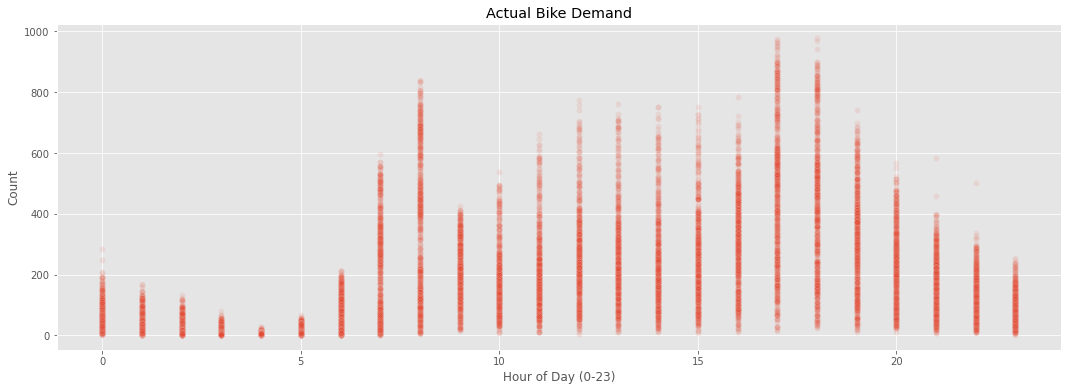

In [33]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x=hour['hr'], y=hour['cnt'], alpha=0.1)
plt.ylabel('Count')
plt.xlabel('Hour of Day (0-23)')
plt.title('Actual Bike Demand')
plt.show()